In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
im =  cv2.imread('virat.jpg') #Reads an image into BGR Format

im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
original_shape = im.shape
print(im.shape)

(2637, 2197, 3)


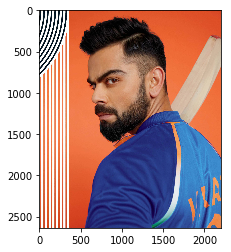

In [3]:
plt.imshow(im) # as RGB Format
plt.show()

In [4]:
# Flatten Each channel of the Image
all_pixels  = im.reshape((-1,3))
print(all_pixels.shape)

(5793489, 3)


In [5]:
from sklearn.cluster import KMeans

In [6]:
dominant_colors = 4

km = KMeans(n_clusters=dominant_colors)
km.fit(all_pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [7]:
centers = km.cluster_centers_

In [8]:
centers = np.array(centers,dtype='uint8')

In [9]:
print(centers)

[[ 45  76 149]
 [221 110  67]
 [235 225 215]
 [ 34  24  26]]


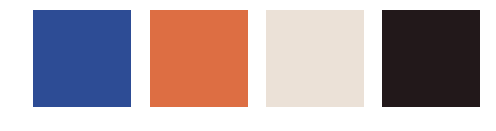

In [12]:
i = 1

plt.figure(0,figsize=(8,2))


colors = []

for each_col in centers:
    plt.subplot(1,4,i)
    plt.axis("off")
    i+=1
    
    colors.append(each_col)
    
    #Color Swatch
    a = np.zeros((100,100,3),dtype='uint8')
    a[:,:,:] = each_col
    plt.imshow(a)
    
plt.show()

In [17]:
new_img = np.zeros((2637*2197,3),dtype='uint8')

print(new_img.shape)

(5793489, 3)


In [18]:
colors

[array([ 45,  76, 149], dtype=uint8),
 array([221, 110,  67], dtype=uint8),
 array([235, 225, 215], dtype=uint8),
 array([34, 24, 26], dtype=uint8)]

In [19]:
km.labels_

array([2, 2, 2, ..., 1, 1, 1])

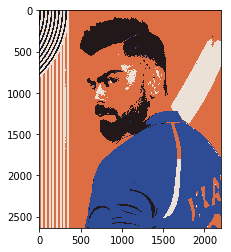

In [20]:
for ix in range(new_img.shape[0]):
    new_img[ix] = colors[km.labels_[ix]]
    
new_img = new_img.reshape((original_shape))
plt.imshow(new_img)
plt.show()

